In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

2024-05-31 23:45:39.049145: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

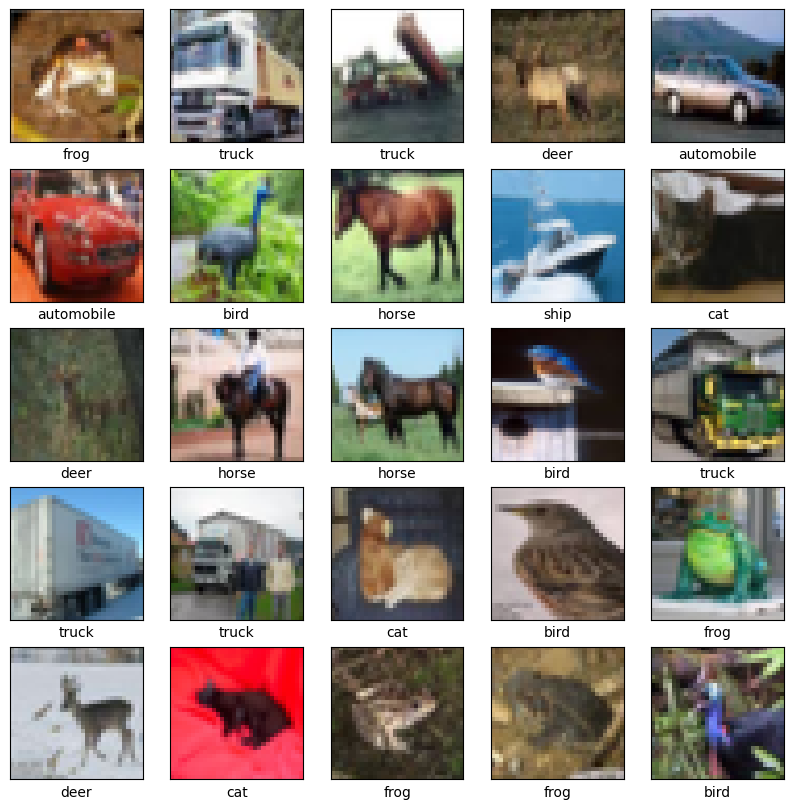

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])

    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [20]:
## Creating the Convolutional Neural Network model 
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

## Neural Network
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='leaky_relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

## Display model architecture
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.6524 - accuracy: 0.3855 - val_loss: 1.4321 - val_accuracy: 0.4627
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.2990 - accuracy: 0.5327 - val_loss: 1.1749 - val_accuracy: 0.5807
Epoch 3/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.1452 - accuracy: 0.5912 - val_loss: 1.1140 - val_accuracy: 0.6069
Epoch 4/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.0491 - accuracy: 0.6285 - val_loss: 1.0550 - val_accuracy: 0.6311
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9697 - accuracy: 0.6592 - val_loss: 0.9952 - val_accuracy: 0.6529
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9149 - accuracy: 0.6767 - val_loss: 1.0077 - val_accuracy: 0.6473
Epoch 7/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8725 - accuracy: 0.6905 - val_loss: 0.9924 -

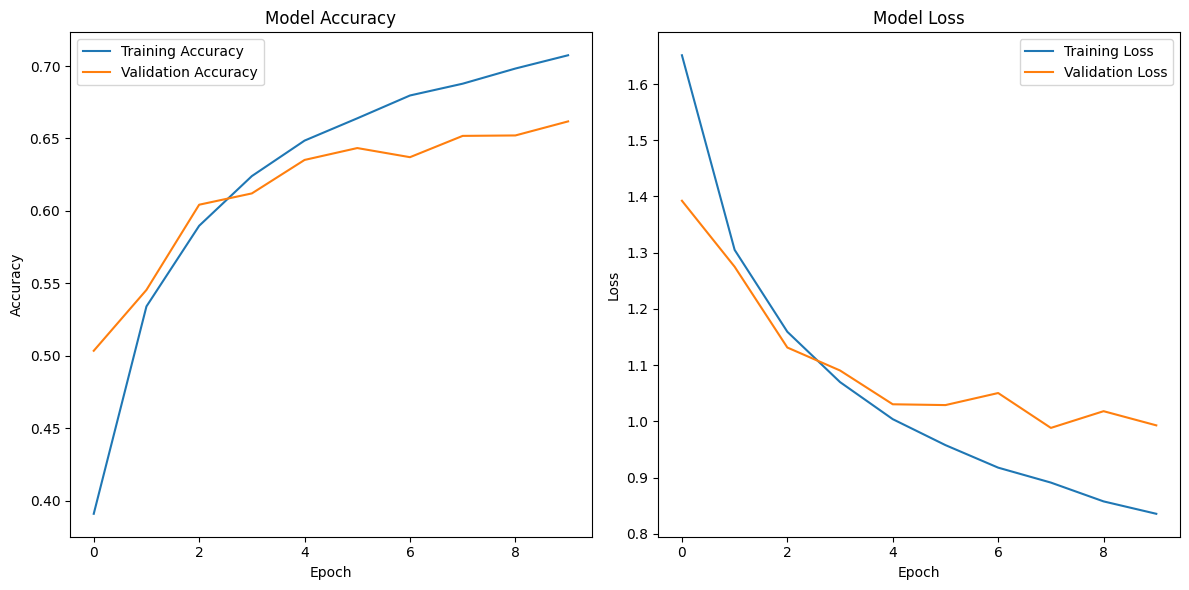

In [19]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
print(test_acc)

0.6614000201225281
